<a href="https://colab.research.google.com/github/Seeethy/Markowitz-portfolio-model-/blob/main/Markowitz_model3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
import pandas_datareader.data as web
from datetime import date
import datetime
from dateutil.relativedelta import relativedelta
import itertools
import matplotlib.pyplot as plt
import pylab as plot
import numpy as np

# 'NVDA' - NVIDIA
# 'TSLA' - Tesla
# 'DIS' - Disney
# 'NFLX' - Netflix
# 'BABA' - Alibaba

tickers = ['NVDA','TSLA','DIS','NFLX','BABA']

today = date.today()
end_date = today.strftime("%Y-%m-%d")
two_years_from_today = date.today() - relativedelta(years=2)
start_date = two_years_from_today.strftime("%Y-%m-%d")
data_source= 'yahoo'

start_date = "2016-02-17"
end_date = "2018-02-17"
data_list = []
for i in range(len(tickers)):
  data = web.DataReader(tickers[i], data_source, start_date, end_date)
  data_list.append(data)


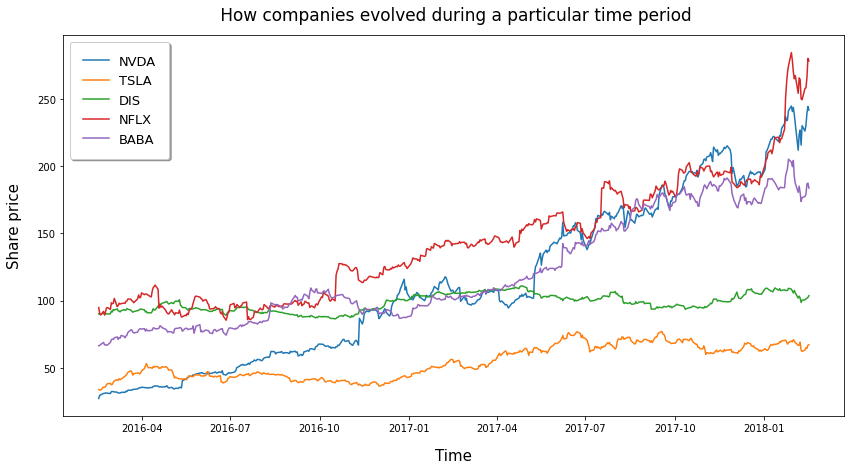

In [143]:

Close_1 = data_list[0].iloc[:, 5]
Close_2 = data_list[1].iloc[:, 5]
Close_3 = data_list[2].iloc[:, 5]
Close_4 = data_list[3].iloc[:, 5]
Close_5 = data_list[4].iloc[:, 5]

index = data_list[0].index

params = {'legend.fontsize': 13, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.figure(figsize=(14, 7))
plt.plot(index, Close_1)
plt.plot(index, Close_2)
plt.plot(index, Close_3)
plt.plot(index, Close_4)
plt.plot(index, Close_5)
plt.title(" How companies evolved during a particular time period",fontsize=17, pad = 15)
plt.xlabel("Time",fontsize=15,labelpad=15)
plt.ylabel("Share price",fontsize=15,labelpad=15)
plt.legend(['NVDA','TSLA','DIS','NFLX','BABA'], loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1) 
plt.show()


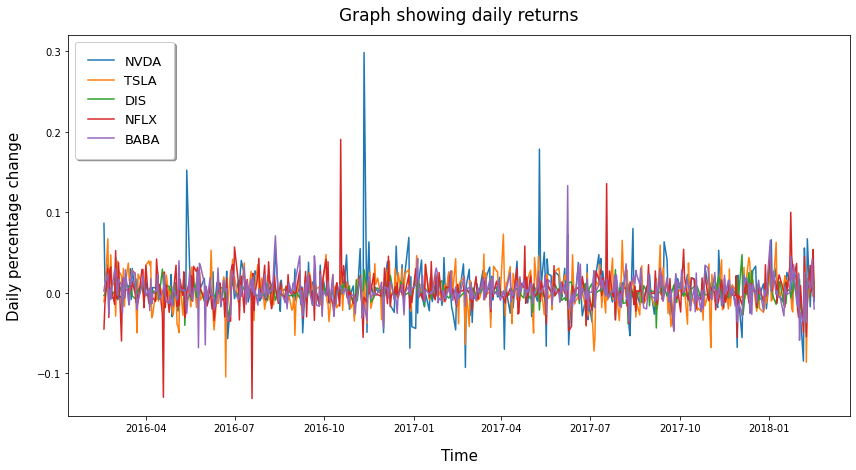

In [144]:

daily_return1 = data_list[0].iloc[:, 5].pct_change()
daily_return2 = data_list[1].iloc[:, 5].pct_change()
daily_return3 = data_list[2].iloc[:, 5].pct_change()
daily_return4 = data_list[3].iloc[:, 5].pct_change()
daily_return5 = data_list[4].iloc[:, 5].pct_change()

index = data_list[0].index

params = {'legend.fontsize': 13, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.figure(figsize=(14, 7))
plt.plot(index, daily_return1)
plt.plot(index, daily_return2)
plt.plot(index, daily_return3)
plt.plot(index, daily_return4)
plt.plot(index, daily_return5)

plt.title("Graph showing daily returns",fontsize=17, pad = 15)
plt.xlabel("Time",fontsize=15,labelpad=15)
plt.ylabel("Daily percentage change",fontsize=15,labelpad=15)
plt.legend(['NVDA','TSLA','DIS','NFLX','BABA'], loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1) 
plt.show()

In [145]:
data = web.DataReader(tickers, data_source, start_date, end_date)

adj_close = data["Adj Close"]
log_returns = np.log(adj_close/adj_close.shift(1))
log_returns

Symbols,NVDA,TSLA,DIS,NFLX,BABA
Date,,,,,
2016-02-17,NaN,NaN,NaN,NaN,NaN
2016-02-18,0.082543,-0.011388,-0.003462,-0.046108,0.002107
2016-02-19,0.013228,-0.001140,-0.001682,-0.014022,0.011360
2016-02-22,0.034865,0.064846,0.014213,0.029810,0.022922
2016-02-23,0.002535,-0.002986,-0.010326,-0.031044,-0.027540
...,...,...,...,...,...
2018-02-12,-0.017605,0.016961,0.002906,0.033427,0.004349
2018-02-13,0.019972,0.024806,0.007036,0.001240,0.010149
2018-02-14,0.037089,-0.004180,0.004599,0.029491,0.041043


In [146]:
log_returns.mean() * 252

Symbols
NVDA    1.092822
TSLA    0.343114
DIS     0.069681
NFLX    0.538004
BABA    0.507892
dtype: float64

In [147]:
log_returns.cov() * 252

Symbols,NVDA,TSLA,DIS,NFLX,BABA
Symbols,,,,,
NVDA,0.179876,0.040045,0.007940,0.041170,0.041343
TSLA,0.040045,0.124708,0.007698,0.033679,0.024174
DIS,0.007940,0.007698,0.023558,0.008082,0.006603
NFLX,0.041170,0.033679,0.008082,0.128395,0.030044
BABA,0.041343,0.024174,0.006603,0.030044,0.077934


In [148]:
log_returns.corr()

Symbols,NVDA,TSLA,DIS,NFLX,BABA
Symbols,,,,,
NVDA,1.000000,0.267371,0.121975,0.270908,0.349180
TSLA,0.267371,1.000000,0.142022,0.266161,0.245214
DIS,0.121975,0.142022,1.000000,0.146952,0.154093
NFLX,0.270908,0.266161,0.146952,1.000000,0.300341
BABA,0.349180,0.245214,0.154093,0.300341,1.000000


Text(0, 0.5, 'Expected Return')

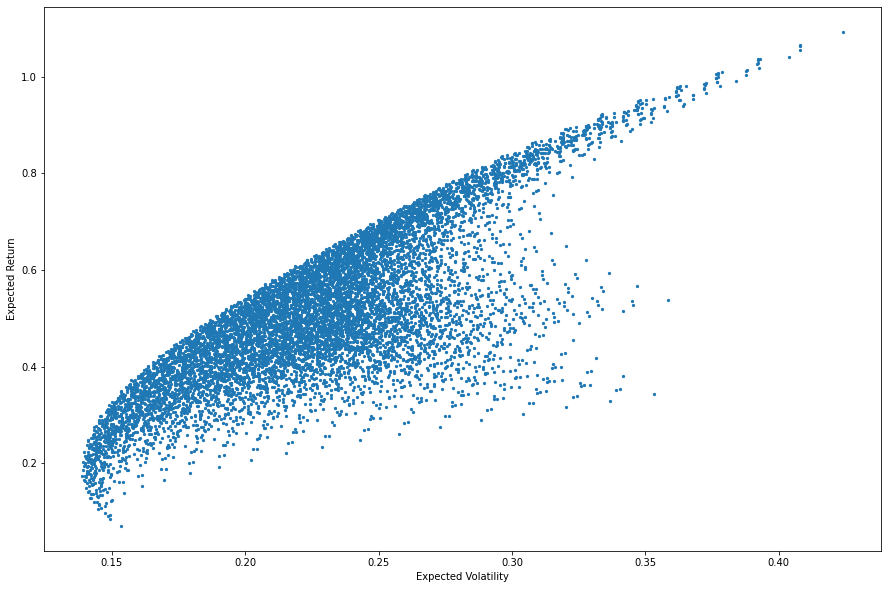

In [155]:
def creating_weights():
  l_weights = []
  for i in range(0,101,5):
      wage = i/100
      l_weights.append(wage)

  solutions = []
  for x in l_weights:
      for y in l_weights:
          for z in l_weights:
              for w in l_weights:
                  for o in l_weights:
                      sol = [x, y, z, w, o]
                      if sum(sol) == 1.0:
                          solutions.append(sol)
  return solutions

weights = creating_weights()
weights = creating_weights()
len(weights)

portfolio_returns = []
portfolio_volatilities = []
weights = np.array(weights)
for i in range(len(weights)):
  portfolio_returns.append(np.sum(weights[i] * log_returns.mean()) * 252)
  portfolio_volatilities.append(np.sqrt(np.dot(weights[i].T, np.dot(log_returns.cov() * 252, weights[i]))))

portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)
                                  
portfolios = pd.DataFrame({'Return': portfolio_returns, 'Volatility':portfolio_volatilities  })
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(15,10), s=5);
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')


Text(0, 0.5, 'Expected Return')

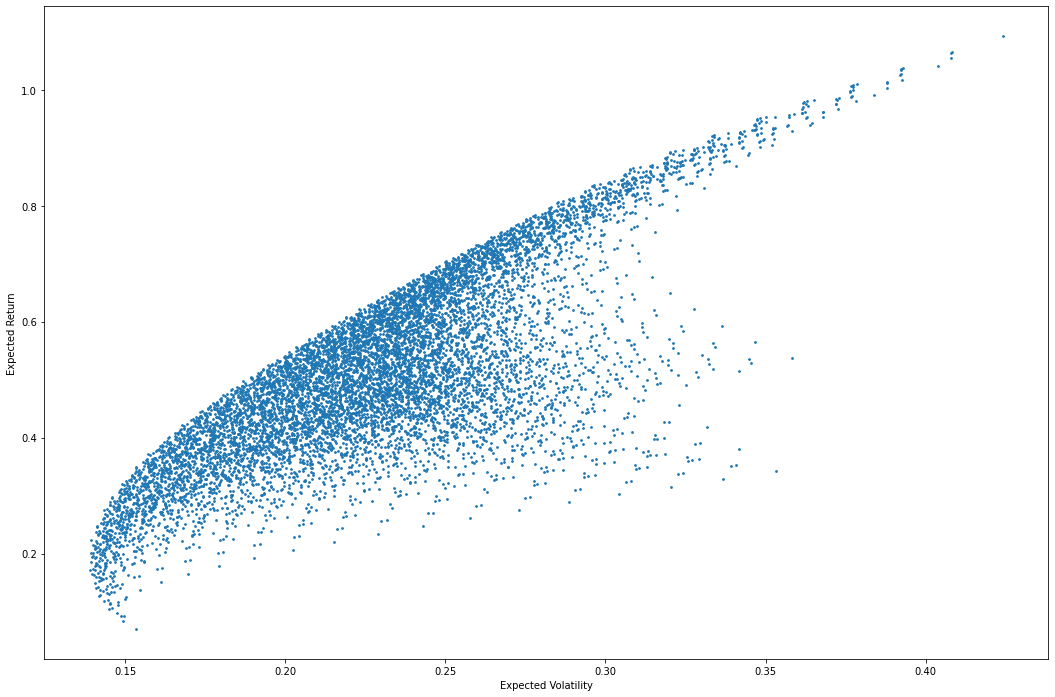

In [174]:
plt.figure(figsize=(18, 12))
#plt.plot(portfolio_volatilities,portfolio_returns, 'o',s=5)
plt.scatter(portfolio_volatilities, portfolio_returns,s=3)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
